NLP model is at the bottom and graphs above are some basic eda.

This simple nlp is made using a airlines flight dataset to ans inquiries about the flights available.

In [20]:
import pandas as pd 
import numpy as mp 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv("C:/Users/srish/Downloads/airlines_flights_data.csv")
df = pd.DataFrame(data)
df.drop('index', axis=1, inplace=True)

In [22]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
freq = df['airline'].value_counts()
freq

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

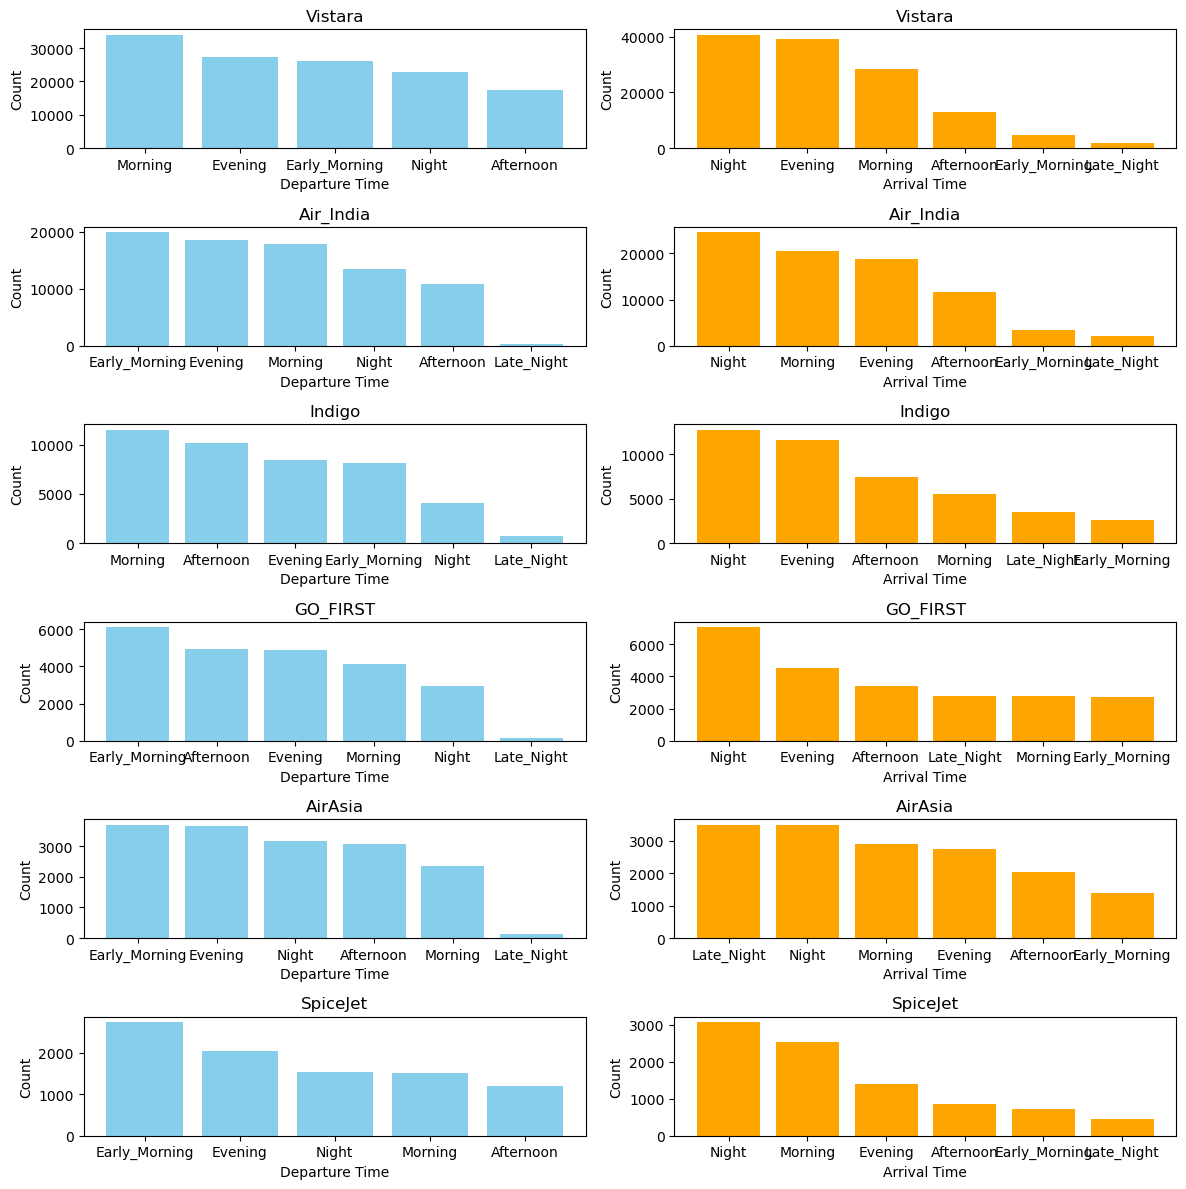

In [24]:
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
for i in range(len(freq)):
    dep_freq = df[df['airline'] == freq.index[i]]['departure_time'].value_counts()
    arr_freq = df[df['airline'] == freq.index[i]]['arrival_time'].value_counts()
    axes[i][0].bar(dep_freq.index, dep_freq.values, color='skyblue')
    axes[i][0].set_title(freq.index[i])
    axes[i][0].set_xlabel('Departure Time')
    axes[i][0].set_ylabel('Count')
    axes[i][1].bar(arr_freq.index, arr_freq.values, color='orange')
    axes[i][1].set_title(freq.index[i])
    axes[i][1].set_xlabel('Arrival Time')
    axes[i][1].set_ylabel('Count')
plt.tight_layout()
plt.show()

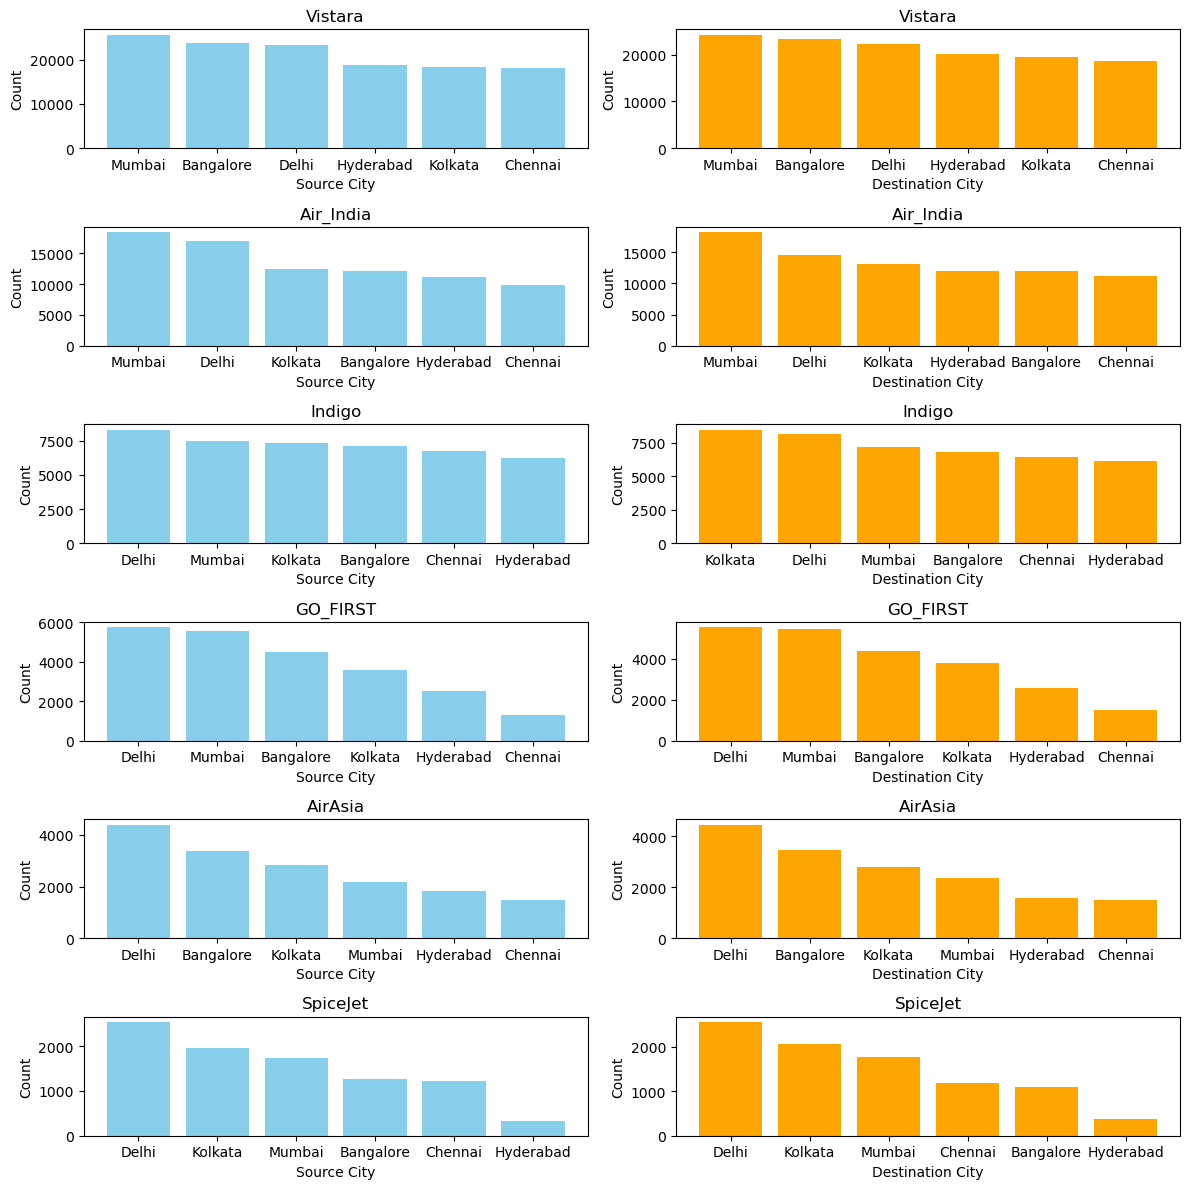

In [25]:
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
for i in range(len(freq)):
    dep_freq = df[df['airline'] == freq.index[i]]['source_city'].value_counts()
    arr_freq = df[df['airline'] == freq.index[i]]['destination_city'].value_counts()
    axes[i][0].bar(dep_freq.index, dep_freq.values, color='skyblue')
    axes[i][0].set_title(freq.index[i])
    axes[i][0].set_xlabel('Source City')
    axes[i][0].set_ylabel('Count')
    axes[i][1].bar(arr_freq.index, arr_freq.values, color='orange')
    axes[i][1].set_title(freq.index[i])
    axes[i][1].set_xlabel('Destination City')
    axes[i][1].set_ylabel('Count')
plt.tight_layout()
plt.show()

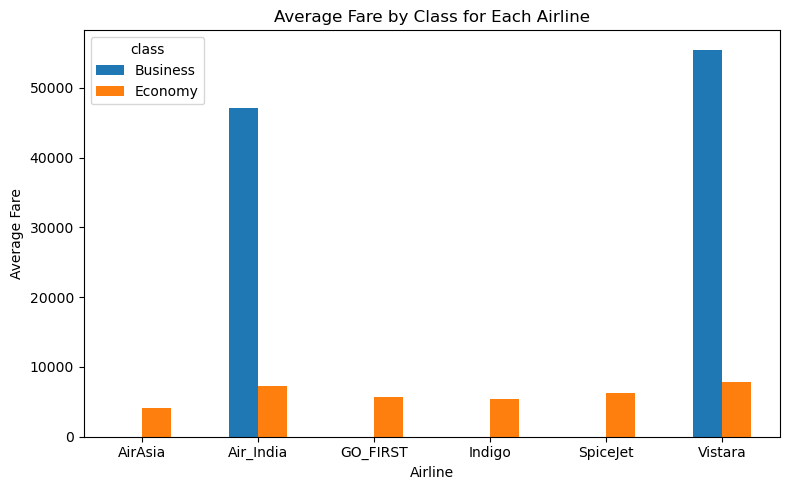

In [26]:
avg_fares = df.groupby(['airline', 'class'])['price'].mean().unstack()
avg_fares.plot(kind='bar', figsize=(8, 5))
plt.title('Average Fare by Class for Each Airline')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

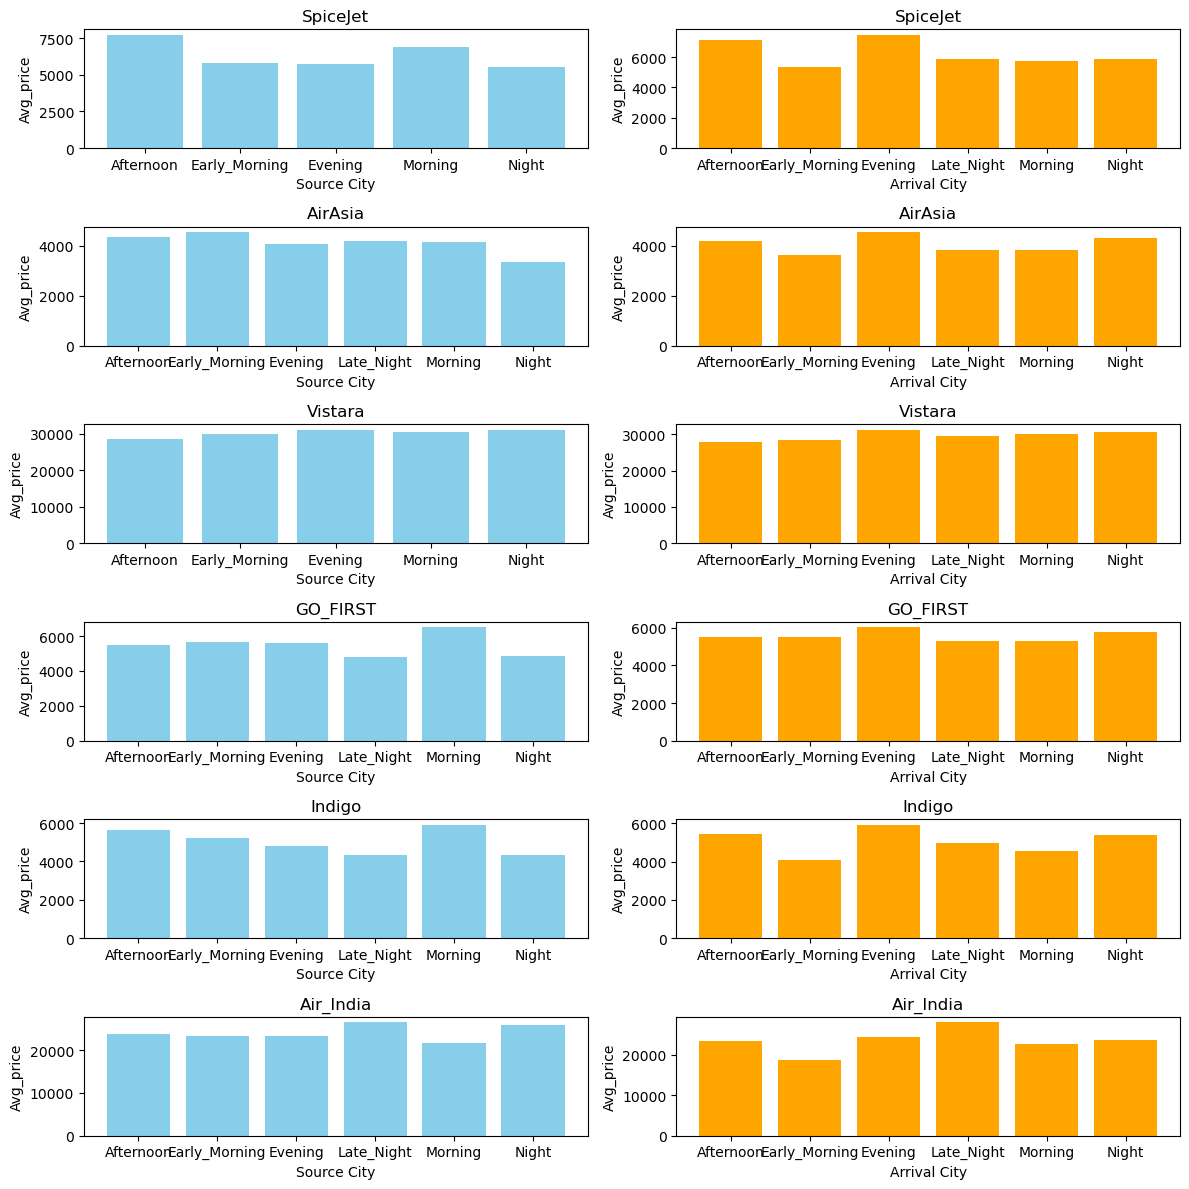

In [27]:
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
dep = df.groupby(['airline','departure_time'])['price'].mean().reset_index()
arr = df.groupby(['airline','arrival_time'])['price'].mean().reset_index()
airlines = df['airline'].unique()
for i,airline in enumerate(airlines):
    #departure costs per airline 
    dep_price = dep[dep['airline'] == airline]
    arr_price = arr[arr['airline'] == airline]
    axes[i][0].bar(dep_price.departure_time, dep_price.price, color='skyblue')
    axes[i][0].set_title(airline)
    axes[i][0].set_xlabel('Source City')
    axes[i][0].set_ylabel('Avg_price')
    axes[i][1].bar(arr_price.arrival_time, arr_price.price, color='orange')
    axes[i][1].set_title(airline)
    axes[i][1].set_xlabel('Arrival City')
    axes[i][1].set_ylabel('Avg_price')
plt.tight_layout()
plt.show()

In [28]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


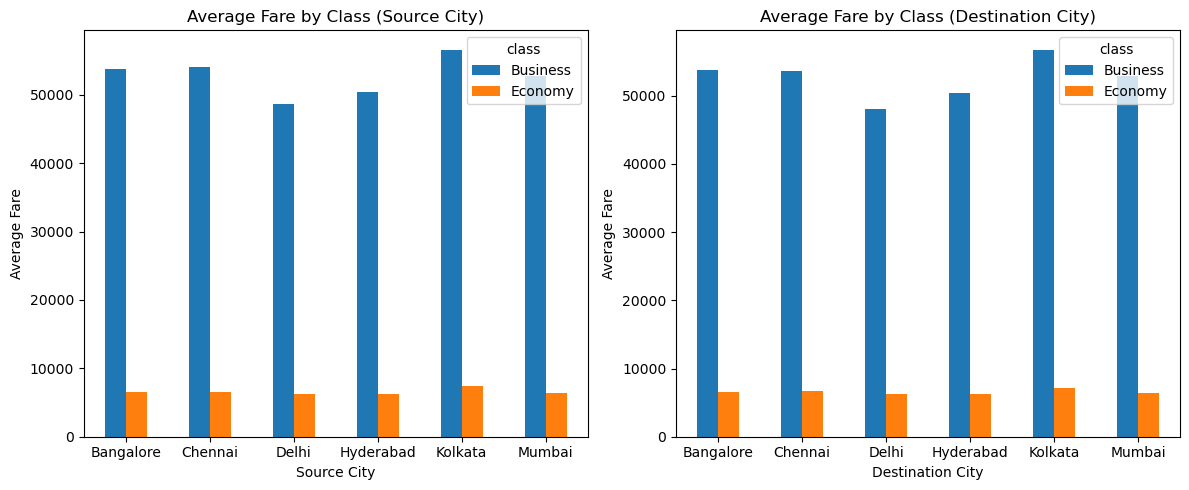

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_dest = df.groupby(['destination_city','class'])['price'].mean().unstack()
df_sour = df.groupby(['source_city','class'])['price'].mean().unstack()
# Source City
df_sour.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Fare by Class (Source City)')
axes[0].set_ylabel('Average Fare')
axes[0].set_xlabel('Source City')
axes[0].tick_params(axis='x', rotation=0)
# Destination City
df_dest.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Fare by Class (Destination City)')
axes[1].set_ylabel('Average Fare')
axes[1].set_xlabel('Destination City')
axes[1].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [30]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


<Figure size 1200x500 with 0 Axes>

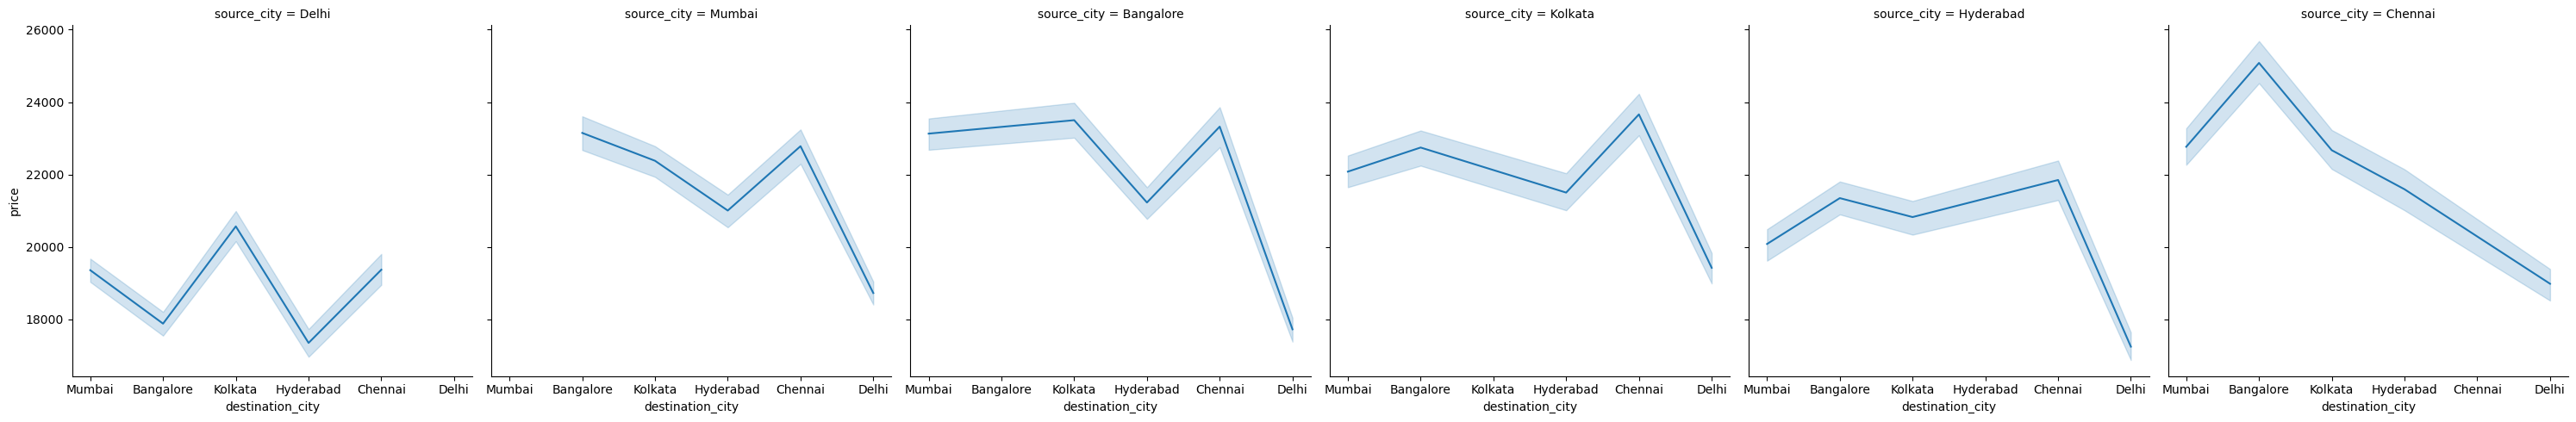

In [31]:
plt.figure(figsize = (12,5))
sns.relplot( x = 'destination_city', y = 'price', data = df, col = "source_city", kind = 'line')
plt.show()

In [32]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [33]:
#How is the price affected when tickets are bought in just 1 or 2 days before departure?
df.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

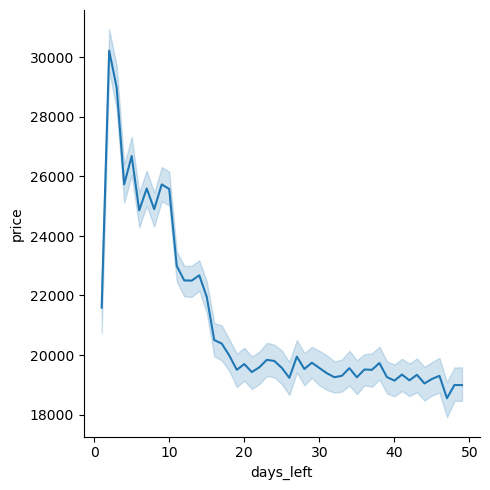

In [34]:
sns.relplot( y='price', x = 'days_left', kind = 'line', data = data )
plt.show()

In [35]:
df_class = df.groupby(['airline','class'])['price'].mean().unstack()
df_class

class,Business,Economy
airline,,
AirAsia,NaN,4091.072742
Air_India,47131.039212,7313.682169
GO_FIRST,NaN,5652.007595
Indigo,NaN,5324.216303
SpiceJet,NaN,6179.278881
Vistara,55477.027777,7806.943645


In [36]:
print("--------------------")
#mean price for economy 
print("Mean for the Economy Class : ",df_class['Economy'].mean())
print("--------------------")
#mean price for business 
print("Mean for the Business Class : ",df_class['Business'].mean())
print("--------------------")

--------------------
Mean for the Economy Class :  6061.20022255421
--------------------
Mean for the Business Class :  51304.033494714735
--------------------


In [37]:
data = df[(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad') & (df['class'] == 'Business')]
print("Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class : ",data['price'].mean())

Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class :  47939.840361445786


In [297]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [269]:
list(df['class'].unique())

['Economy', 'Business']

In [211]:
import spacy 
from spacy.training import Example
import random 
import re
from ensure import ensure_annotations 

In [474]:
def clean_city(city_name: str) -> str:
    return re.sub(r"^(to|from)\s+", "", city_name, flags=re.IGNORECASE).strip().lower()
    
@ensure_annotations 
def output(entry: dict,df: pd.DataFrame) -> pd.DataFrame:
    date = entry.get("DATE", [None])[0]
    ex_date = None
    if date:
        match = re.search(r"\d+", date)
        if match:
            ex_date = int(match.group())
    mask = pd.Series(True, index=df.index)
    print("Total rows at start:", mask.sum())
    
    if 'DEST_CITY' in entry and entry['DEST_CITY']:
        dest_city = clean_city(entry['DEST_CITY'][0])
        cond = df['destination_city'].str.lower().str.contains(dest_city, na=False)
        print(f"Rows after destination city '{dest_city}':", cond.sum())
        mask &= cond
        
    if 'SOUR_CITY' in entry and entry['SOUR_CITY']:
        source_city = clean_city(entry['SOUR_CITY'][0])
        cond = df['source_city'].str.lower().str.contains(source_city, na=False)
        print(f"Rows after source city '{source_city}':", cond.sum())
        mask &= cond
    cond = df['departure_time'].isin(entry.get('TIME_OF_DAY', df['departure_time'].unique()))
    print("Rows after TIME_OF_DAY filter:", cond.sum())
    mask &= cond
    cond = df['airline'].str.lower().isin([a.lower() for a in entry.get('AIRLINE', df['airline'].unique())])
    print("Rows after airline filter:", cond.sum())
    mask &= cond
    cond = df['class'].isin(entry.get('CLASS', df['class'].unique()))
    print("Rows after class filter:", cond.sum())
    mask &= cond
    if ex_date is not None:
        cond = df['days_left'] == ex_date
        print(f"Rows after days_left == {ex_date} filter:", cond.sum())
        mask &= cond
    df_fil = df[mask].sort_values(by="price", ascending=True)
    print("Final rows:", df_fil.shape[0])
    return df_fil.head(10)
@ensure_annotations
def Ask(query : str,df : pd.DataFrame):
    query = query.strip().lower()
    nlp = spacy.load("en_core_web_md")
    ruler = nlp.add_pipe("entity_ruler", before="ner",config = {"phrase_matcher_attr" : "LOWER"})
    time_values = ['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']
    airline = list(df['airline'].unique())
    clas = list(df['class'].unique())
    patterns = [
        {"label": "PREF", "pattern": "cheapest"},
        {"label": "PREF", "pattern": "fastest"},
        {"label": "PREF", "pattern": "lowest cost"},
        {"label": "PREF", "pattern": "best value"},
        {"label": "PREF", "pattern": "budget-friendly"},
        {"label": "PREF", "pattern": "economical"},
        {"label": "PREF", "pattern": "cost-effective"},
        {"label": "PREF", "pattern": "shortest"},
        {"label": "PREF", "pattern": "most efficient"},
        {"label": "PREF", "pattern": "quickest"}, 
        {"label": "UNDER", "pattern": "in"},
    ] + [{"label": "TIME_OF_DAY", "pattern": t} for t in time_values] + \
    [{"label": "CLASS", "pattern": t} for t in clas] + \
    [{"label" : "AIRLINE", "pattern" : t} for t in airline] + \
    [{"label" : "DEST_CITY", "pattern" : 'to ' + t} for t in list(df['source_city'].unique())] + \
    [{"label" : "SOUR_CITY", "pattern" : 'from ' + t} for t in list(df['source_city'].unique())]
    
    ruler.add_patterns(patterns)
    doc = nlp(query)
    entry = {}
    for ent in doc.ents:
        if ent.label_ in entry.keys():
            entry[ent.label_].append(ent.text.capitalize())
            continue
        entry[ent.label_] = [ent.text.capitalize()]
    return entry  

In [490]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [502]:
query = "i want a vistara flight from delhi to bangalore" #<---Enter anything you want here 
ask = Ask(query,df)
ans = output(ask,df)
ans

Total rows at start: 300153
Rows after destination city 'bangalore': 51068
Rows after source city 'delhi': 61343
Rows after TIME_OF_DAY filter: 300153
Rows after airline filter: 127859
Rows after class filter: 300153
Final rows: 5379


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
19269,Vistara,UK-871,Delhi,Night,one,Evening,Bangalore,Economy,22.92,46,3229
19268,Vistara,UK-871,Delhi,Night,one,Morning,Bangalore,Economy,12.25,46,3229
15327,Vistara,UK-899,Delhi,Afternoon,one,Evening,Bangalore,Economy,4.75,28,3357
18196,Vistara,UK-879,Delhi,Evening,one,Evening,Bangalore,Economy,25.83,41,3357
13356,Vistara,UK-859,Delhi,Morning,one,Morning,Bangalore,Economy,22.42,19,3357
15328,Vistara,UK-829,Delhi,Early_Morning,one,Evening,Bangalore,Economy,12.00,28,3357
15329,Vistara,UK-871,Delhi,Night,one,Morning,Bangalore,Economy,12.25,28,3357
15330,Vistara,UK-879,Delhi,Evening,one,Morning,Bangalore,Economy,15.17,28,3357
15331,Vistara,UK-899,Delhi,Afternoon,one,Morning,Bangalore,Economy,18.08,28,3357
15332,Vistara,UK-871,Delhi,Night,one,Evening,Bangalore,Economy,22.92,28,3357
